# Evaluating Logistic Regression Models - Lab

## Introduction

In regression, you are predicting continuous values so it makes sense to discuss error as a distance of how far off our estimates were. When classifying a binary variable, however, a model is either correct or incorrect. As a result, we tend to quantify this in terms of how many false positives versus false negatives we come across. In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm. In this lab, you'll review precision, recall, accuracy, and F1 score in order to evaluate our logistic regression models.


## Objectives 

In this lab you will: 

- Implement evaluation metrics from scratch using Python 



## Terminology review  

Let's take a moment and review some classification evaluation metrics:  


$$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $$    

$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$  
  
$$ \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} $$

$$ \text{F1 score} = 2 * \frac{\text{Precision * Recall}}{\text{Precision + Recall}} $$


At times, it may be best to tune a classification algorithm to optimize against precision or recall rather than overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is preferable to optimize for recall, the number of cancer positive cases, than it is to optimize precision, the percentage of our predicted cancer-risk patients who are indeed positive.

## Split the data into training and test sets

In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Split the data first into `X` and `y`, and then into training and test sets. Assign 25% to the test set and set the `random_state` to 0. 

In [2]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into X and y
y = df['target']
X = df.drop('target', axis=1)

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Build a vanilla logistic regression model

- Import and instantiate `LogisticRegression` 
- Make sure you do not use an intercept term and use the `'liblinear'` solver 
- Fit the model to training data

In [3]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate LogisticRegression
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')

# Fit to training data
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(fit_intercept=False, solver='liblinear')

## Write a function to calculate the precision

In [33]:
def precision(y, y_hat):
    # Your code here
    y = list(y)
    y_hat = list(y_hat)

    tp = 0
    fp = 0

    for i in range(len(y_hat)):
        if(y_hat[i] == 1):
            if(y[i] == 1):
                tp += 1
            else:
                fp += 1

    return tp / (tp + fp)

## Write a function to calculate the recall

In [39]:
def recall(y, y_hat):
    # Your code here
    y = list(y)
    y_hat = list(y_hat)

    tp = 0
    fn = 0

    for i in list(range(len(y))):
        if(y_hat[i] == 1 and y[i] == 1):
            tp += 1
        elif(y_hat[i] == 0 and y[i] == 1):
            fn += 1
            
    return tp / (tp + fn)

## Write a function to calculate the accuracy

In [41]:
def accuracy(y, y_hat):
    # Your code here
    y = list(y)
    y_hat = list(y_hat)

    tp = 0
    fp = 0
    tn = 0
    fn = 0

    for i in range(len(y)):
        if(y[i] == 1):
            if(y_hat[i] == 1):
                tp += 1
            else:
                fn += 1
        else:
            if(y_hat[i] == 1):
                fp += 1
            else:
                tn += 1
    
    return (tp + tn) / (tp + fp + tn + fn)

## Write a function to calculate the F1 score

In [34]:
def f1_score(y, y_hat):
    # Your code here
    
    pr = precision(y, y_hat)
    rc = recall(y, y_hat)

    return 2 * (pr * rc) / (pr + rc)

## Calculate the precision, recall, accuracy, and F1 score of your classifier 

Do this for both the training and test sets. 

In [43]:
# Your code here
y_hat_train = model_log.predict(X_train)
y_hat_test = model_log.predict(X_test)

print(f'Train Precision: {precision(y_train, y_hat_train)}')
print(f'Test Precision: {precision(y_test, y_hat_test)}')
print()

print(f'Train Recall: {recall(y_train, y_hat_train)}')
print(f'Test Recall: {recall(y_test, y_hat_test)}')
print()

print(f'Train Accuracy: {accuracy(y_train, y_hat_train)}')
print(f'Test Accuracy: {accuracy(y_test, y_hat_test)}')
print()

print(f'Train F1-score: {f1_score(y_train, y_hat_train)}')
print(f'Test F1-score: {f1_score(y_test, y_hat_test)}')

Train Precision: 0.8345864661654135
Test Precision: 0.8125

Train Recall: 0.9098360655737705
Test Recall: 0.9069767441860465

Train Accuracy: 0.8546255506607929
Test Accuracy: 0.8289473684210527

Train F1-score: 0.8705882352941177
Test F1-score: 0.8571428571428572


Great job! Now it's time to check your work with `sklearn`. 

## Calculate metrics with `sklearn`

Each of the metrics we calculated above is also available inside the `sklearn.metrics` module.  

In the cell below, import the following functions:

* `precision_score`
* `recall_score`
* `accuracy_score`
* `f1_score`

Compare the results of your performance metrics functions above with the `sklearn` functions. Calculate these values for both your train and test set. 

In [44]:
# Your code here
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print(f'Train Precision: {precision_score(y_train, y_hat_train)}')
print(f'Test Precision: {precision_score(y_test, y_hat_test)}')
print()

print(f'Train Recall: {recall_score(y_train, y_hat_train)}')
print(f'Test Recall: {recall_score(y_test, y_hat_test)}')
print()

print(f'Train Accuracy: {accuracy_score(y_train, y_hat_train)}')
print(f'Test Accuracy: {accuracy_score(y_test, y_hat_test)}')
print()

print(f'Train F1-score: {f1_score(y_train, y_hat_train)}')
print(f'Test F1-score: {f1_score(y_test, y_hat_test)}')

Train Precision: 0.8345864661654135
Test Precision: 0.8125

Train Recall: 0.9098360655737705
Test Recall: 0.9069767441860465

Train Accuracy: 0.8546255506607929
Test Accuracy: 0.8289473684210527

Train F1-score: 0.8705882352941177
Test F1-score: 0.8571428571428572


Nicely done! Did the results from `sklearn` match that of your own? 

## Compare precision, recall, accuracy, and F1 score for train vs test sets

Calculate and then plot the precision, recall, accuracy, and F1 score for the test and training splits using different training set sizes. What do you notice?

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []

for i in range(10, 95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(i/100), random_state=42) # replace the "None" here
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train) 
    
    # Your code here
    training_precision.append(precision_score(y_train, y_hat_train))
    testing_precision.append(precision_score(y_test, y_hat_test))
    training_recall.append(recall_score(y_train, y_hat_train))
    testing_recall.append(recall_score(y_test, y_hat_test))
    training_accuracy.append(accuracy_score(y_train, y_hat_train))
    testing_accuracy.append(accuracy_score(y_test, y_hat_test))
    training_f1.append(f1_score(y_train, y_hat_train))
    testing_f1.append(f1_score(y_test, y_hat_test))

Create four scatter plots looking at the train and test precision in the first one, train and test recall in the second one, train and test accuracy in the third one, and train and test F1 score in the fourth one. 

We already created the scatter plot for precision: 

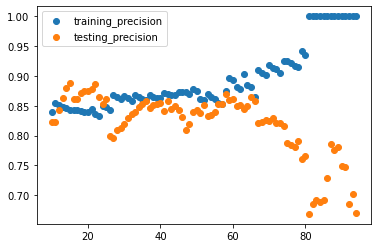

In [53]:
# Train and test precision
plt.scatter(list(range(10, 95)), training_precision, label='training_precision')
plt.scatter(list(range(10, 95)), testing_precision, label='testing_precision')
plt.legend()
plt.show()

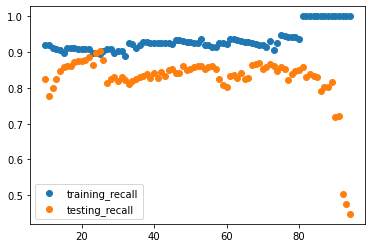

In [54]:
# Train and test recall
plt.scatter(list(range(10, 95)), training_recall, label='training_recall')
plt.scatter(list(range(10, 95)), testing_recall, label='testing_recall')
plt.legend()
plt.show()

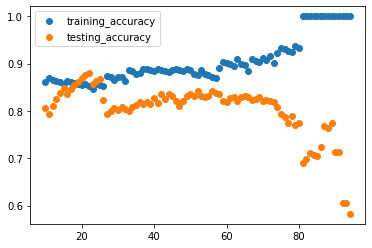

In [55]:
# Train and test accuracy
plt.scatter(list(range(10, 95)), training_accuracy, label='training_accuracy')
plt.scatter(list(range(10, 95)), testing_accuracy, label='testing_accuracy')
plt.legend()
plt.show()

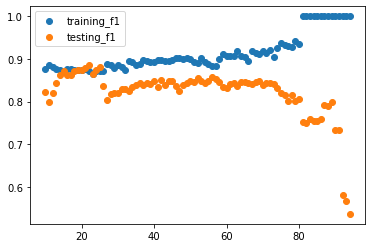

In [56]:
# Train and test F1 score
plt.scatter(list(range(10, 95)), training_f1, label='training_f1')
plt.scatter(list(range(10, 95)), testing_f1, label='testing_f1')
plt.legend()
plt.show()

## Summary

Nice! In this lab, you calculated evaluation metrics for classification algorithms from scratch in Python. Going forward, continue to think about scenarios in which you might prefer to optimize one of these metrics over another.